# IMDB Review Sentiment Analysis

In [73]:
pwd

'C:\\Users\\sethw\\Desktop\\Caltech Bootcamp\\NLP\\Lesson 10\\10.02 Demo RNN 1 - Build Model'

In [1]:
#importing relevant libraries
import keras
from keras.datasets import imdb  
from keras.preprocessing.sequence import pad_sequences  
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.layers import Embedding  
from keras.callbacks import ModelCheckpoint  
import os  
from sklearn.metrics import roc_auc_score, roc_curve  
import pandas as pd
import matplotlib.pyplot as plt  
%matplotlib inline

## NLP Sentiment Analysis with Dense Layers

In [2]:
# output directory
'''
This specifies the output directory where model files, checkpoints, 
etc will be saved during and after training. Here it is set to a 
directory called 'model_output/dense'.
'''
output_dir = 'model_output/dense'

# training:
'''
This sets the number of epochs (full passes through the training data) to 4. 
So the model will be trained for 4 epochs.
'''
epochs = 4
'''
This defines the batch size, which is the number of samples processed 
at a time before updating the model weights. Here the batch size is 128.
'''
batch_size = 128

#embedding layer
'''
This sets the dimension of the embedding vectors to 64. Each word will 
be represented by a 64-dimensional vector.
'''
n_dim = 64
'''
This specifies the vocabulary size, meaning there are 5000 
unique words to be embedded.
'''
n_unique_words = 5000
'''
This indicates that the 50 most common words (like 'the', 'a', etc) 
should be skipped and not embedded. This helps reduce dimensionality.
'''
n_words_to_skip = 50
'''
This sets the maximum length of each text sample to 100 words. 
Reviews longer than 100 words will be truncated.
'''
max_review_length = 100
'''
This indicates that padding and truncation should happen at the 
beginning of the sequences. So sequences will be padded with zeros 
or truncated from the start to reach the max length.
'''
pad_type = trunc_type = 'pre'

#dense layers parameters
'''
This sets the number of units in dense layers to 64. Dense layers are fully 
connected layers where each node is connected to all nodes in the previous layer. 
So this indicates the dense layers should have 64 nodes.
'''
n_dense = 64
'''
Dropout is a regularization technique where a percentage of node connections are randomly 
dropped during training. This prevents overfitting. Here dropout is set to 0.5, meaning 
50% of connections will be randomly dropped during training.
'''
dropout = 0.5

In [3]:
#loading data and splitting into training and validation sets
(x_train, y_train), (x_valid, y_valid) = imdb.load_data(num_words=n_unique_words, 
                                                        skip_top=n_words_to_skip)

'''
Breakdown
--> num_words = n_unique_words

    This limits the dataset to only the n_unique_words most frequent words found in the data. 
    Other infrequent words are discarded.

--> skip_top = n_words_to_skip

    This causes the load_data method to skip loading the top n_words_to_skip most frequent words, 
    as they are often common words that don't carry much signal (like 'the', 'and', etc).
'''

"\nBreakdown\n--> num_words = n_unique_words\n\n    This limits the dataset to only the n_unique_words most frequent words found in the data. \n    Other infrequent words are discarded.\n\n--> skip_top = n_words_to_skip\n\n    This causes the load_data method to skip loading the top n_words_to_skip most frequent words, \n    as they are often common words that don't carry much signal (like 'the', 'and', etc).\n"

In [4]:
#accessing x_train data array
'''
x_train - This refers to the training data input features. x_train contains 
encoded movie reviews as integer word indices.

So x_train[0:6] will return the first 6 samples from the training data.
'''
x_train[0:6] 

array([list([2, 2, 2, 2, 2, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 2, 173, 2, 256, 2, 2, 100, 2, 838, 112, 50, 670, 2, 2, 2, 480, 284, 2, 150, 2, 172, 112, 167, 2, 336, 385, 2, 2, 172, 4536, 1111, 2, 546, 2, 2, 447, 2, 192, 50, 2, 2, 147, 2025, 2, 2, 2, 2, 1920, 4613, 469, 2, 2, 71, 87, 2, 2, 2, 530, 2, 76, 2, 2, 1247, 2, 2, 2, 515, 2, 2, 2, 626, 2, 2, 2, 62, 386, 2, 2, 316, 2, 106, 2, 2, 2223, 2, 2, 480, 66, 3785, 2, 2, 130, 2, 2, 2, 619, 2, 2, 124, 51, 2, 135, 2, 2, 1415, 2, 2, 2, 2, 215, 2, 77, 52, 2, 2, 407, 2, 82, 2, 2, 2, 107, 117, 2, 2, 256, 2, 2, 2, 3766, 2, 723, 2, 71, 2, 530, 476, 2, 400, 317, 2, 2, 2, 2, 1029, 2, 104, 88, 2, 381, 2, 297, 98, 2, 2071, 56, 2, 141, 2, 194, 2, 2, 2, 226, 2, 2, 134, 476, 2, 480, 2, 144, 2, 2, 2, 51, 2, 2, 224, 92, 2, 104, 2, 226, 65, 2, 2, 1334, 88, 2, 2, 283, 2, 2, 4472, 113, 103, 2, 2, 2, 2, 2, 178, 2]),
       list([2, 194, 1153, 194, 2, 78, 228, 2, 2, 1463, 4369, 2, 134, 2, 2, 715, 2, 118, 1634, 2, 394, 2, 2, 119, 954, 189, 102, 2, 20

## What does the output above ^ represent?
- Each list represents a review, total of 6 
- The number in the lists represent the following:
    - 0: Padding
    - 1: Starting Token
    - 2: Tokens that occur very frequently across the corpus (top 50)
    - 3: The most frequently ocurring word in the corpus
    - 4: The second most frequently ocurring word
    - 5: The third most frequently docurring word and so on 

In [5]:
#check lengths of reviews:
'''
Here we are simply checking the lengths. You will see that the rview lengths
vary a lot. Padding will be implemented later to make them the same length. 
'''
for x in x_train[0:6]:
    print(len(x))

218
189
141
550
147
43


In [6]:
#accessing y_train data, 0 for negative and 1 for positive
y_train[0:6]

array([1, 0, 0, 1, 0, 0], dtype=int64)

In [7]:
#varifying that training and validation sets are split 50/50
len(x_train), len(x_valid)

(25000, 25000)

In [8]:
#preprocessing the word index
'''
Get the word to integer index mapping used in the IMDB dataset.
'''
word_index = keras.datasets.imdb.get_word_index()
'''
Shifts the index values by 3, so the lowest index is 3 instead of 0. 
This reserves 0 for padding, 1 for start, 2 for unknown.
'''
word_index = {k:(v+3) for k,v in word_index.items()}
'''
Settingthe integer indexes for the padding, start, and unkown tokens.
'''
word_index["PAD"] = 0
word_index["START"] = 1
word_index["UNK"] = 2

In [9]:
#creating a reverse lookup index that maps integer indices to words.
index_word = {v:k for k,v in word_index.items()}

In [10]:
x_train[0]

[2,
 2,
 2,
 2,
 2,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 2,
 173,
 2,
 256,
 2,
 2,
 100,
 2,
 838,
 112,
 50,
 670,
 2,
 2,
 2,
 480,
 284,
 2,
 150,
 2,
 172,
 112,
 167,
 2,
 336,
 385,
 2,
 2,
 172,
 4536,
 1111,
 2,
 546,
 2,
 2,
 447,
 2,
 192,
 50,
 2,
 2,
 147,
 2025,
 2,
 2,
 2,
 2,
 1920,
 4613,
 469,
 2,
 2,
 71,
 87,
 2,
 2,
 2,
 530,
 2,
 76,
 2,
 2,
 1247,
 2,
 2,
 2,
 515,
 2,
 2,
 2,
 626,
 2,
 2,
 2,
 62,
 386,
 2,
 2,
 316,
 2,
 106,
 2,
 2,
 2223,
 2,
 2,
 480,
 66,
 3785,
 2,
 2,
 130,
 2,
 2,
 2,
 619,
 2,
 2,
 124,
 51,
 2,
 135,
 2,
 2,
 1415,
 2,
 2,
 2,
 2,
 215,
 2,
 77,
 52,
 2,
 2,
 407,
 2,
 82,
 2,
 2,
 2,
 107,
 117,
 2,
 2,
 256,
 2,
 2,
 2,
 3766,
 2,
 723,
 2,
 71,
 2,
 530,
 476,
 2,
 400,
 317,
 2,
 2,
 2,
 2,
 1029,
 2,
 104,
 88,
 2,
 381,
 2,
 297,
 98,
 2,
 2071,
 56,
 2,
 141,
 2,
 194,
 2,
 2,
 2,
 226,
 2,
 2,
 134,
 476,
 2,
 480,
 2,
 144,
 2,
 2,
 2,
 51,
 2,
 2,
 224,
 92,
 2,
 104,
 2,
 226,
 65,
 2,
 2,
 1334,
 88,
 2

In [11]:
#reverse mapping
'''
Reverse mapping index to word (index_word). Created from the original word_index used to encode the sequences. 
This reverse lookup table is essential for decoding sequences back to human-readable text.
'''

' '.join(index_word[id] for id in x_train[0])

"UNK UNK UNK UNK UNK brilliant casting location scenery story direction everyone's really suited UNK part UNK played UNK UNK could UNK imagine being there robert UNK UNK UNK amazing actor UNK now UNK same being director UNK father came UNK UNK same scottish island UNK myself UNK UNK loved UNK fact there UNK UNK real connection UNK UNK UNK UNK witty remarks throughout UNK UNK were great UNK UNK UNK brilliant UNK much UNK UNK bought UNK UNK UNK soon UNK UNK UNK released UNK UNK UNK would recommend UNK UNK everyone UNK watch UNK UNK fly UNK UNK amazing really cried UNK UNK end UNK UNK UNK sad UNK UNK know what UNK say UNK UNK cry UNK UNK UNK UNK must UNK been good UNK UNK definitely UNK also UNK UNK UNK two little UNK UNK played UNK UNK UNK norman UNK paul UNK were UNK brilliant children UNK often left UNK UNK UNK UNK list UNK think because UNK stars UNK play them UNK grown up UNK such UNK big UNK UNK UNK whole UNK UNK these children UNK amazing UNK should UNK UNK UNK what UNK UNK done do

In [12]:
#printing full review
(all_x_train,_),(all_x_valid,_) = imdb.load_data()

In [13]:
' '.join(index_word[id] for id in all_x_train[0])

"START this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert redford's is an amazing actor and now the same being director norman's father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the part's of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and shou

In [14]:
x_train = pad_sequences(x_train, maxlen=max_review_length, 
                        padding=pad_type, truncating=trunc_type, value=0)
x_valid = pad_sequences(x_valid, maxlen=max_review_length, 
                        padding=pad_type, truncating=trunc_type, value=0)

'''
Breakdown
--> maxlen=max_review_length - The maximum length to pad/truncate to. Reviews longer than this will be truncated. 
                               Shorter ones padded.
    
--> padding=pad_type - Specifies which side to pad sequences - 'pre' pads at the beginning.

--> truncating=trunc_type - Specifies which side to truncate from - 'pre' truncates from the start.
    
--> value=0 - Specifies the integer value to pad with, in this case 0.
      
So for example if max_review_length=100, this will pad all training sequences to length 100 by adding 0's to the start. 
Sequences longer than 100 will be truncated from the start to be 100 tokens long.

This makes all sequences the same length for modeling. The max length and padding approach can impact what data the model sees. 
Value of 0 allows padding to be easily distinguished from real words.

Fixed, padded lengths are required for training most deep learning models like CNNs and RNNs on sequence data. 
The padding parameters should be tuned for the dataset and model.
'''

"\nBreakdown\n--> maxlen=max_review_length - The maximum length to pad/truncate to. Reviews longer than this will be truncated. \n                               Shorter ones padded.\n    \n--> padding=pad_type - Specifies which side to pad sequences - 'pre' pads at the beginning.\n\n--> truncating=trunc_type - Specifies which side to truncate from - 'pre' truncates from the start.\n    \n--> value=0 - Specifies the integer value to pad with, in this case 0.\n      \nSo for example if max_review_length=100, this will pad all training sequences to length 100 by adding 0's to the start. \nSequences longer than 100 will be truncated from the start to be 100 tokens long.\n\nThis makes all sequences the same length for modeling. The max length and padding approach can impact what data the model sees. \nValue of 0 allows padding to be easily distinguished from real words.\n\nFixed, padded lengths are required for training most deep learning models like CNNs and RNNs on sequence data. \nThe pa

In [15]:
#check lengths again after padding
x_train[0:6]

array([[1415,    2,    2,    2,    2,  215,    2,   77,   52,    2,    2,
         407,    2,   82,    2,    2,    2,  107,  117,    2,    2,  256,
           2,    2,    2, 3766,    2,  723,    2,   71,    2,  530,  476,
           2,  400,  317,    2,    2,    2,    2, 1029,    2,  104,   88,
           2,  381,    2,  297,   98,    2, 2071,   56,    2,  141,    2,
         194,    2,    2,    2,  226,    2,    2,  134,  476,    2,  480,
           2,  144,    2,    2,    2,   51,    2,    2,  224,   92,    2,
         104,    2,  226,   65,    2,    2, 1334,   88,    2,    2,  283,
           2,    2, 4472,  113,  103,    2,    2,    2,    2,    2,  178,
           2],
       [ 163,    2, 3215,    2,    2, 1153,    2,  194,  775,    2,    2,
           2,  349, 2637,  148,  605,    2,    2,    2,  123,  125,   68,
           2,    2,    2,  349,  165, 4362,   98,    2,    2,  228,    2,
           2,    2, 1157,    2,  299,  120,    2,  120,  174,    2,  220,
         175,  136,   5

In [16]:
for x in x_train[0:6]:
    print(len(x))

100
100
100
100
100
100


In [17]:
' '.join(index_word[id] for id in x_train[5])

'PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD PAD UNK begins better than UNK ends funny UNK UNK russian UNK crew UNK UNK other actors UNK UNK those scenes where documentary shots UNK UNK spoiler part UNK message UNK UNK contrary UNK UNK whole story UNK UNK does UNK UNK UNK UNK'

## Observations from above ^
1. Review lists now include 0's, indicating that padding has been applied.
2. Lengths are now fixed and meet requirement for tensor format. 

In [18]:
# This code defines a sequential Keras model for sentiment classification using an embedding layer and dense network.
model = Sequential()
model.add(Embedding(n_unique_words, n_dim, input_length=max_review_length))
model.add(Flatten())
model.add(Dense(n_dense, activation='relu'))
model.add(Dropout(dropout))
model.add(Dense(1, activation='sigmoid'))
model.summary() 

'''
Breakdown
-->Sequential() - Creates a Keras Sequential model, which is a linear stack of layers.

-->Embedding() - Creates an embedding layer that maps integer word indices to dense vectors of length n_dim. 
                 It takes the vocabulary size and input length as arguments.

-->Flatten() - Flattens the output of the Embedding layer to 1D so it can be input to a dense layer.

-->Dense(n_dense) - A fully-connected dense layer with n_dense nodes. Applies a ReLU activation function.

-->Dropout(dropout) - Applies dropout regularization with a dropout rate of dropout.

-->Dense(1) - Final dense layer with 1 node for binary classification. Applies a sigmoid activation for probability output.

-->model.summary() - Prints a summary of the model architecture, including the shape and number of parameters for each layer.
'''

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 64)           320000    
                                                                 
 flatten (Flatten)           (None, 6400)              0         
                                                                 
 dense (Dense)               (None, 64)                409664    
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 729729 (2.78 MB)
Trainable params: 729729 (2.78 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


'\nBreakdown\n-->Sequential() - Creates a Keras Sequential model, which is a linear stack of layers.\n\n-->Embedding() - Creates an embedding layer that maps integer word indices to dense vectors of length n_dim. \n                 It takes the vocabulary size and input length as arguments.\n\n-->Flatten() - Flattens the output of the Embedding layer to 1D so it can be input to a dense layer.\n\n-->Dense(n_dense) - A fully-connected dense layer with n_dense nodes. Applies a ReLU activation function.\n\n-->Dropout(dropout) - Applies dropout regularization with a dropout rate of dropout.\n\n-->Dense(1) - Final dense layer with 1 node for binary classification. Applies a sigmoid activation for probability output.\n\n-->model.summary() - Prints a summary of the model architecture, including the shape and number of parameters for each layer.\n'

In [19]:
n_dim, n_unique_words, n_dim*n_unique_words # embedding layer

(64, 5000, 320000)

In [20]:
max_review_length, n_dim, n_dim*max_review_length # flatten

(100, 64, 6400)

In [21]:
n_dense, n_dim*max_review_length*n_dense + n_dense # dense: weights + biases

(64, 409664)

In [22]:
n_dense + 1 # output

65

In [23]:
#This code configures the model compilation and checkpointing before training:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
modelcheckpoint = ModelCheckpoint(filepath=output_dir+"/weights.{epoch:02d}.hdf5")
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    
'''
Breakdown

-->model.compile() - Configures the model for training by specifying the loss, optimizer, and metrics to monitor.

                    * loss='binary_crossentropy' - Specifies binary crossentropy as the loss function, commonly used for binary classification.
                    * optimizer='adam' - Sets the adam optimizer for training, which is an efficient gradient descent algorithm.
                    * metrics=['accuracy'] - Specifies accuracy as an additional metric to monitor during training besides the loss.
                    
-->ModelCheckpoint() - Creates a callback to save the model checkpoint during training after each epoch.

                    * filepath - Specifies the file path template to save the checkpoint files. {epoch} is formatted to 2 digits.
-->if not os.path.exists(output_dir) - Checks if the output directory exists, and creates it if not.

So in summary, this configures the model for training by setting the loss, optimizer, and metrics. It sets up model checkpointing to repeatedly 
save the model weights during training. The output directory is created if needed.

Compiling and checkpointing are essential steps to configure the training process. The settings like batch size, loss, and optimizer 
impact model performance and training dynamics.
'''

"\nBreakdown\n\n-->model.compile() - Configures the model for training by specifying the loss, optimizer, and metrics to monitor.\n\n                    * loss='binary_crossentropy' - Specifies binary crossentropy as the loss function, commonly used for binary classification.\n                    * optimizer='adam' - Sets the adam optimizer for training, which is an efficient gradient descent algorithm.\n                    * metrics=['accuracy'] - Specifies accuracy as an additional metric to monitor during training besides the loss.\n                    \n-->ModelCheckpoint() - Creates a callback to save the model checkpoint during training after each epoch.\n\n                    * filepath - Specifies the file path template to save the checkpoint files. {epoch} is formatted to 2 digits.\n-->if not os.path.exists(output_dir) - Checks if the output directory exists, and creates it if not.\n\nSo in summary, this configures the model for training by setting the loss, optimizer, and met

In [24]:
# train
model.fit(x_train, y_train, 
          batch_size=batch_size, epochs=epochs, verbose=1, 
          validation_data=(x_valid, y_valid), 
          callbacks=[modelcheckpoint])

Epoch 1/4
196/196 [==============================] - 5s 22ms/step - loss: 0.5368 - accuracy: 0.7081 - val_loss: 0.3459 - val_accuracy: 0.8483
Epoch 2/4
  7/196 [>.............................] - ETA: 3s - loss: 0.2594 - accuracy: 0.9051

C:\Users\sethw\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


196/196 [==============================] - 4s 20ms/step - loss: 0.2577 - accuracy: 0.8998 - val_loss: 0.3542 - val_accuracy: 0.8452
Epoch 3/4
196/196 [==============================] - 4s 20ms/step - loss: 0.0869 - accuracy: 0.9761 - val_loss: 0.4540 - val_accuracy: 0.8317
Epoch 4/4
196/196 [==============================] - 4s 20ms/step - loss: 0.0174 - accuracy: 0.9978 - val_loss: 0.5452 - val_accuracy: 0.8333


## Inferences from output above^
1. We can see the training loss and accuracy improve with each epoch as the model trains. 
2. Validation loss shows some overfitting, increasing when training loss decreases.

In [25]:
#This code is loading trained weights into the model and then making predictions on the validation data.
model.load_weights(output_dir+"/weights.02.hdf5") # NOT zero-indexed
y_hat = model.predict(x_valid)

'''
Breakdown
-->model.load_weights() - Loads weights values into the model layers.

-->output_dir+"/weights.02.hdf5" - The path to the weights file. Here it loads weights.02.hdf5 from the output_dir.

-->y_hat = model.predict(x_valid) - Makes predictions on the validation data (x_valid) using the loaded model.

-->model.predict() returns the raw predictions rather than class probabilities.

-->y_hat will contain the predictions on the validation set, to compare to the true y_valid labels.

So in summary, this restores the model weights from checkpoint 2, then uses the trained model to make predictions on the validation data.
'''

782/782 [==============================] - 2s 2ms/step


In [26]:
#first review, 0 indicates negative review
y_valid[0]

0

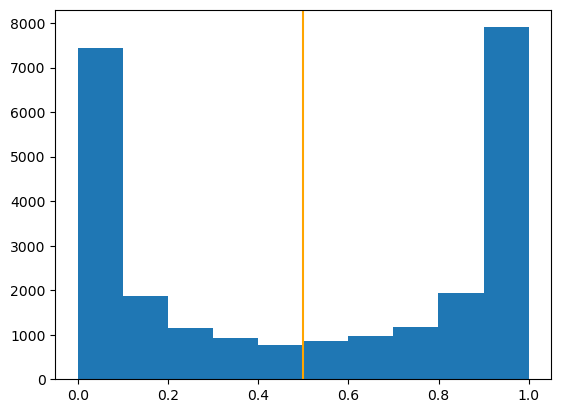

In [27]:
#plotting the weights
plt.hist(y_hat)
_ = plt.axvline(x=0.5, color='orange')

In [28]:
#accuracy
pct_auc = roc_auc_score(y_valid, y_hat)*100.0
"{:0.2f}".format(pct_auc)

'92.60'

In [29]:
float_y_hat = []
for y in y_hat:
    float_y_hat.append(y[0])
    

In [30]:
#printing out the negative review 
' '.join(index_word[id] for id in all_x_valid[0])

"START please give this one a miss br br kristy swanson and the rest of the cast rendered terrible performances the show is flat flat flat br br i don't know how michael madison could have allowed this one on his plate he almost seemed to know this wasn't going to work out and his performance was quite lacklustre so all you madison fans give this a miss"

## NLP Sentiment Analysis with RNN and RNN variants LTSM and GRU

In [51]:
#import additional libraries
from keras.layers import SpatialDropout1D, LSTM, GRU, SimpleRNN
from keras.layers import Bidirectional

In [35]:
# output directory
output_dir = 'model_output/rnn'

# training
epochs = 4
batch_size = 128

# embedding: 
n_dim = 64 
n_unique_words = 10000 
n_words_to_skip = 50
max_review_length = 100 
pad_type = trunc_type = 'pre'
drop_embed = 0.2 


In [36]:
# RNN 
n_rnn = 256 
drop_rnn = 0.2

# LSTM/Bi
n_lstm = 256 
drop_lstm = 0.2

# Stacked
n_lstm_1 = 64  
n_lstm_2 = 64  
drop2_lstm = 0.2

# GRU 
n_gru = 256 
drop_gru = 0.2

## RNN

In [68]:
# RNN

model = Sequential()
model.add(Embedding(n_unique_words, n_dim, input_length=max_review_length)) 
model.add(SpatialDropout1D(drop_embed))
model.add(SimpleRNN(n_rnn, dropout=drop_rnn))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 100, 64)           640000    
                                                                 
 spatial_dropout1d_6 (Spati  (None, 100, 64)           0         
 alDropout1D)                                                    
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 256)               82176     
                                                                 
 dense_7 (Dense)             (None, 1)                 257       
                                                                 
Total params: 722433 (2.76 MB)
Trainable params: 722433 (2.76 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [69]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

modelcheckpoint = ModelCheckpoint(filepath=output_dir+"/weights.{epoch:02d}.hdf5")
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

In [70]:
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_valid, y_valid), callbacks=[modelcheckpoint])

Epoch 1/4
196/196 [==============================] - 32s 157ms/step - loss: 0.7042 - accuracy: 0.5148 - val_loss: 0.7355 - val_accuracy: 0.4999
Epoch 2/4
  1/196 [..............................] - ETA: 26s - loss: 0.7904 - accuracy: 0.4141

C:\Users\sethw\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


196/196 [==============================] - 30s 155ms/step - loss: 0.6765 - accuracy: 0.5687 - val_loss: 0.6852 - val_accuracy: 0.5388
Epoch 3/4
196/196 [==============================] - 31s 156ms/step - loss: 0.6389 - accuracy: 0.6142 - val_loss: 0.6373 - val_accuracy: 0.6135
Epoch 4/4
196/196 [==============================] - 31s 160ms/step - loss: 0.5773 - accuracy: 0.6897 - val_loss: 0.6899 - val_accuracy: 0.5962


782/782 [==============================] - 13s 17ms/step


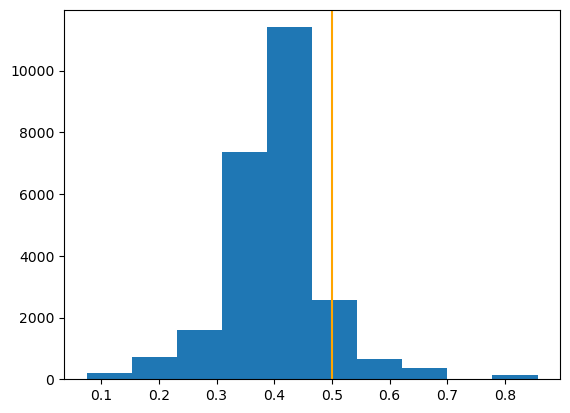

In [71]:
model.load_weights(output_dir+"/weights.02.hdf5")
y_hat = model.predict(x_valid)

plt.hist(y_hat)
_ = plt.axvline(x=0.5, color='orange')

In [72]:
"{:0.2f}".format(roc_auc_score(y_valid, y_hat)*100.0)

'62.07'

## LSTM

In [44]:
# LSTM

model = Sequential()
model.add(Embedding(n_unique_words, n_dim, input_length=max_review_length)) 
model.add(SpatialDropout1D(drop_embed))
model.add(LSTM(n_lstm, dropout=drop_lstm))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 64)           640000    
                                                                 
 spatial_dropout1d_1 (Spati  (None, 100, 64)           0         
 alDropout1D)                                                    
                                                                 
 lstm (LSTM)                 (None, 256)               328704    
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 968961 (3.70 MB)
Trainable params: 968961 (3.70 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [45]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

modelcheckpoint = ModelCheckpoint(filepath=output_dir+"/weights.{epoch:02d}.hdf5")
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

In [46]:
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_valid, y_valid), callbacks=[modelcheckpoint])

Epoch 1/4
196/196 [==============================] - 133s 664ms/step - loss: 0.5308 - accuracy: 0.7215 - val_loss: 0.3596 - val_accuracy: 0.8442
Epoch 2/4


C:\Users\sethw\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


196/196 [==============================] - 128s 652ms/step - loss: 0.3246 - accuracy: 0.8631 - val_loss: 0.3653 - val_accuracy: 0.8416
Epoch 3/4
196/196 [==============================] - 126s 644ms/step - loss: 0.2913 - accuracy: 0.8813 - val_loss: 0.4301 - val_accuracy: 0.8376
Epoch 4/4
196/196 [==============================] - 122s 624ms/step - loss: 0.2663 - accuracy: 0.8923 - val_loss: 0.3610 - val_accuracy: 0.8417


782/782 [==============================] - 66s 84ms/step


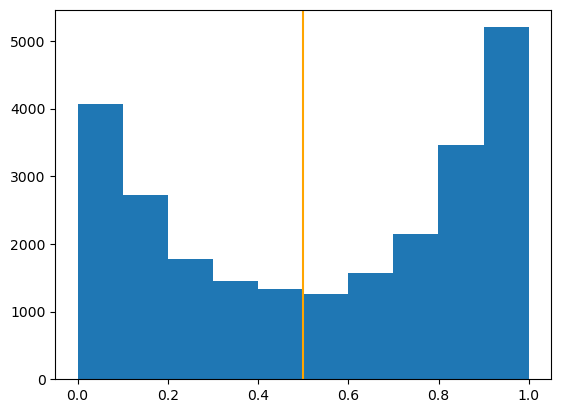

In [47]:
model.load_weights(output_dir+"/weights.02.hdf5")
y_hat = model.predict(x_valid)

plt.hist(y_hat)
_ = plt.axvline(x=0.5, color='orange')

In [48]:
"{:0.2f}".format(roc_auc_score(y_valid, y_hat)*100.0)

'92.22'

## Bidirectional LSTM

In [52]:
# Bidirectional LSTM

model = Sequential()
model.add(Embedding(n_unique_words, n_dim, input_length=max_review_length)) 
model.add(SpatialDropout1D(drop_embed))
model.add(Bidirectional(LSTM(n_lstm, dropout=drop_lstm)))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 100, 64)           640000    
                                                                 
 spatial_dropout1d_3 (Spati  (None, 100, 64)           0         
 alDropout1D)                                                    
                                                                 
 bidirectional (Bidirection  (None, 512)               657408    
 al)                                                             
                                                                 
 dense_4 (Dense)             (None, 1)                 513       
                                                                 
Total params: 1297921 (4.95 MB)
Trainable params: 1297921 (4.95 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [53]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

modelcheckpoint = ModelCheckpoint(filepath=output_dir+"/weights.{epoch:02d}.hdf5")
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

In [54]:
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_valid, y_valid), callbacks=[modelcheckpoint])

Epoch 1/4
196/196 [==============================] - 221s 1s/step - loss: 0.5532 - accuracy: 0.6922 - val_loss: 0.3772 - val_accuracy: 0.8369
Epoch 2/4


C:\Users\sethw\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


196/196 [==============================] - 222s 1s/step - loss: 0.3296 - accuracy: 0.8632 - val_loss: 0.3646 - val_accuracy: 0.8412
Epoch 3/4
196/196 [==============================] - 222s 1s/step - loss: 0.2892 - accuracy: 0.8821 - val_loss: 0.3574 - val_accuracy: 0.8433
Epoch 4/4
196/196 [==============================] - 224s 1s/step - loss: 0.2616 - accuracy: 0.8953 - val_loss: 0.3750 - val_accuracy: 0.8428


782/782 [==============================] - 108s 134ms/step


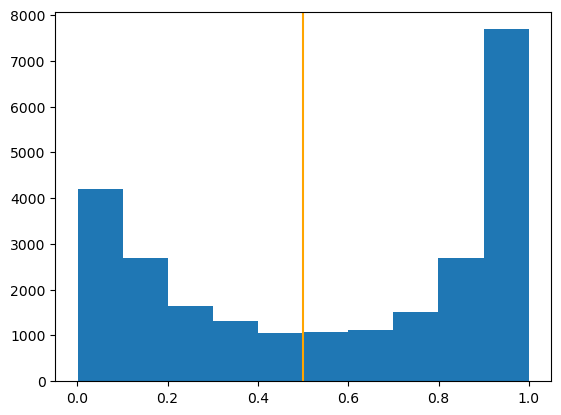

In [55]:
model.load_weights(output_dir+"/weights.02.hdf5")
y_hat = model.predict(x_valid)

plt.hist(y_hat)
_ = plt.axvline(x=0.5, color='orange')

In [56]:
"{:0.2f}".format(roc_auc_score(y_valid, y_hat)*100.0)

'92.65'

## GRU

In [57]:
# GRU

model = Sequential()
model.add(Embedding(n_unique_words, n_dim, input_length=max_review_length)) 
model.add(SpatialDropout1D(drop_embed))
model.add(GRU(n_gru, dropout=drop_gru))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 100, 64)           640000    
                                                                 
 spatial_dropout1d_4 (Spati  (None, 100, 64)           0         
 alDropout1D)                                                    
                                                                 
 gru (GRU)                   (None, 256)               247296    
                                                                 
 dense_5 (Dense)             (None, 1)                 257       
                                                                 
Total params: 887553 (3.39 MB)
Trainable params: 887553 (3.39 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [58]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

modelcheckpoint = ModelCheckpoint(filepath=output_dir+"/weights.{epoch:02d}.hdf5")
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

In [59]:
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_valid, y_valid), callbacks=[modelcheckpoint])

Epoch 1/4
196/196 [==============================] - 83s 413ms/step - loss: 0.5999 - accuracy: 0.6518 - val_loss: 0.4043 - val_accuracy: 0.8199
Epoch 2/4


C:\Users\sethw\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


196/196 [==============================] - 80s 409ms/step - loss: 0.3562 - accuracy: 0.8473 - val_loss: 0.3523 - val_accuracy: 0.8470
Epoch 3/4
196/196 [==============================] - 82s 418ms/step - loss: 0.2940 - accuracy: 0.8787 - val_loss: 0.3564 - val_accuracy: 0.8486
Epoch 4/4
196/196 [==============================] - 83s 424ms/step - loss: 0.2530 - accuracy: 0.8994 - val_loss: 0.3726 - val_accuracy: 0.8379


782/782 [==============================] - 30s 37ms/step


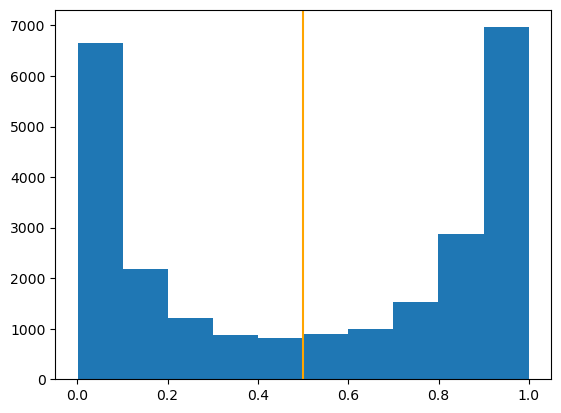

In [61]:
model.load_weights(output_dir+"/weights.02.hdf5")
y_hat = model.predict(x_valid)

plt.hist(y_hat)
_ = plt.axvline(x=0.5, color='orange')


In [62]:
"{:0.2f}".format(roc_auc_score(y_valid, y_hat)*100.0)

'92.48'

## Stacked

In [63]:
# stacked 

model = Sequential()
model.add(Embedding(n_unique_words, n_dim, input_length=max_review_length)) 
model.add(SpatialDropout1D(drop_embed))
model.add(Bidirectional(LSTM(n_lstm_1, dropout=drop_lstm, 
                             return_sequences=True))) 
model.add(Bidirectional(LSTM(n_lstm_2, dropout=drop_lstm)))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 100, 64)           640000    
                                                                 
 spatial_dropout1d_5 (Spati  (None, 100, 64)           0         
 alDropout1D)                                                    
                                                                 
 bidirectional_1 (Bidirecti  (None, 100, 128)          66048     
 onal)                                                           
                                                                 
 bidirectional_2 (Bidirecti  (None, 128)               98816     
 onal)                                                           
                                                                 
 dense_6 (Dense)             (None, 1)                 129       
                                                      

In [64]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

modelcheckpoint = ModelCheckpoint(filepath=output_dir+"/weights.{epoch:02d}.hdf5")
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

In [65]:
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_valid, y_valid), callbacks=[modelcheckpoint])

Epoch 1/4
196/196 [==============================] - 135s 652ms/step - loss: 0.4697 - accuracy: 0.7551 - val_loss: 0.3460 - val_accuracy: 0.8477
Epoch 2/4


C:\Users\sethw\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


196/196 [==============================] - 135s 690ms/step - loss: 0.3060 - accuracy: 0.8744 - val_loss: 0.3458 - val_accuracy: 0.8510
Epoch 3/4
196/196 [==============================] - 150s 764ms/step - loss: 0.2610 - accuracy: 0.8943 - val_loss: 0.3624 - val_accuracy: 0.8424
Epoch 4/4
196/196 [==============================] - 142s 725ms/step - loss: 0.2259 - accuracy: 0.9106 - val_loss: 0.3902 - val_accuracy: 0.8361


782/782 [==============================] - 37s 45ms/step


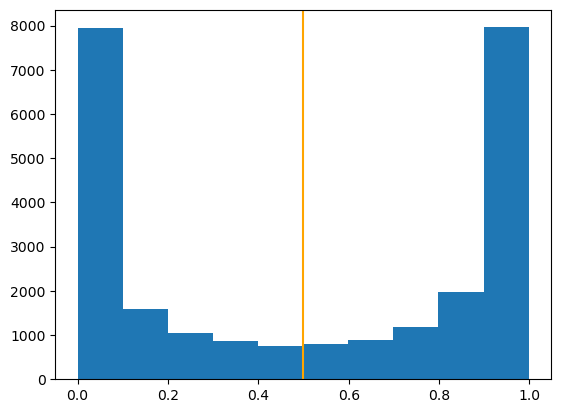

In [66]:
model.load_weights(output_dir+"/weights.02.hdf5")
y_hat = model.predict(x_valid)

plt.hist(y_hat)
_ = plt.axvline(x=0.5, color='orange')

In [67]:
"{:0.2f}".format(roc_auc_score(y_valid, y_hat)*100.0)

'92.99'